<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/informe7_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Corte de varillas**



**Entrada:** Largo de varilla $n$, vector de precios por cada medida $i = 1...n$

**Salida:** Retorno máximo $r_n$, el cual se obtiene cortando la varilla y vendiendo sus partes. 

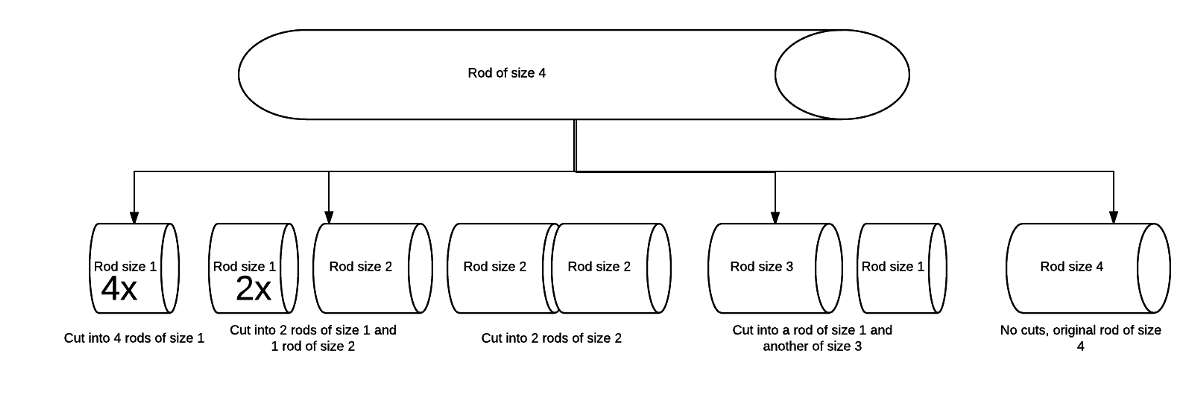

En el siguiente informe se analizará el problema de **Corte de varillas**, el cual busca la máxima ganancia que se puede obtener cortando una varilla, en la cual la medida de cada corte tiene un precio fijo. 

Este problema contiene propiedades fundamentales de la **programación dinámica** y puede ser resuelto de forma eficiente con ella. Esto pasa porque tenemos subproblemas que son resueltos múltiples veces, y como estos son llamados de nuevo se puede decir que tiene la propiedad de superposición de subproblemas. 

# **2. Cutting Rod**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **Cutting Rod.**

### Cutting Rod Recursivo


In [39]:
import math
from termcolor import colored
def recursiveCuttingRod(p, n, cont, verbose = False):
  # Caso Base
  if(n <= 0):
    if (verbose == True):
      print("Caso base (largo == 0)\n")      
    return 0
  # G almacena la mayor ganacia
  g = -math.inf   

  # Se recorre el largo de la barra
  for i in range(n):
    # Se obtiene el costo mayor y aumenta el contador de llamadas recursivas
    cont[0] += 1
    cut = p[i] + recursiveCuttingRod(p, n - i - 1, cont) 
    g = max(g, cut)
    if (verbose == True):
      print(f"Coste de la varilla de largo {i+1}: {colored(p[i], 'magenta')}")
      print(f"Corte máximo en {i+1}: {colored(cut, 'cyan')}")
      print(f"Retorno máximo actual: {colored(q, 'blue')}\n")
  # Retornamos el valor de maxima ganancia
  if (verbose == True):
    print(f"Ganancia máxima: {colored(g, 'green')}")
  return g

a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
cut = [0] * (len(a) + 1)
g = recursiveCuttingRod(a, len(a), cont)
print("Ganancia maxima: ", g)
print("LLamadas recursivas:", cont[0])

Ganancia maxima:  90
LLamadas recursivas: 1023


### Cutting Rod Dinámico

In [40]:
import math
from termcolor import colored

def dynamicCuttingRod(p, n, cont, verbose = False):
  # Creamos la tabla de largo n
  val = [0 for x in range(n + 1)]

  # La posición 0 siempre es 0
  if (verbose == True):
    print("El valor del subproblema 0 siempre es 0\n")
  val[0] = 0

  # Recorremos los elementos
  for i in range(1, n+1):
    g = -math.inf   
    if(verbose == True):
        print(f"Cortes posibles para varilla de largo {i}:")
    for j in range(i):
      cont[0] += 1
      if(verbose == True):
        print(f"{colored(p[j] + val[i-j-1], 'magenta')}", end = " ")
      g = max(q, p[j] + val[i-j-1])

      # Se almacenan los subproblemas
    val[i] = g
    if(verbose == True):
      print("")
      print(f"Valor máximo del subproblema {i} = {colored(val[i], 'cyan')}\n")
  
  if(verbose == True):
      print(f"Ganancia máxima: {colored(val[n], 'green')}")
  return val[n]

#Ejemplo
a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
g = dynamicCuttingRod(a, len(a), cont)
print("Ganancia maxima:", g)
print("Cantidad de subproblemas resueltos:", cont[0])
print("Mejor corte:", cut[len(a)])

Ganancia maxima: 90
Cantidad de subproblemas resueltos: 55
Mejor corte: 0


## 2.2. Descripción del algoritmo

**Cutting Rod Recursivo**

Se define una variable $g$ que almacena la ganancia máxima de una varilla, variable que se irá actualizando en la ejecución del algoritmo. Esta variable comienza con un valor mínimo para poder realizar las comparaciones de manera correcta.

**Para comenzar:** Se recorre mediante un ciclo todos los subproblemas, partiendo desde $0$ hasta el largo de $n$ de la varilla a través de una variable $i$.

Este corte causa la creación de dos varillas, una de largo $n$ y otra de largo $n-i$, en donde el costo de la última varilla mencionada se debe resolver de manera recursiva.

Se suman las ganancias de las dos varillas $p[i]$ y $p[i-1]$, y luego se llama a la función $max$ para comparar si el corte es mayor a $g$. De ser verdadero se actualiza la variable, sino se mantiene el valor actual como ganancia máxima. 

Al finalizar el algoritmo se retorna la ganancia máxima ($g$) de la varilla ingresada.

**Cutting Rod dinámico**

**SubEstructura Óptima**

Para una varilla de largo $n$ el retorno máximo puede ser la varilla completa  o una sub-varilla más el retorno máximo $g$ de la varilla restante.

**Función recursiva para el retorno máximo**:

$g = max(p_i + r_{n-1})$

***Cutting Rod***

**Paso 1:** Se recibe la lista de precios por medida de la varilla y el largo de esta.

**Paso 2**: Se crea un vector para registrar los resultados de los subproblemas que se irán resolviendo de menor a mayor tamaño **(bottom-up)**.

**Paso 3**: Se comienza resolviendo el problema más pequeño encontrando su ganancia máxima y guardándola en el vector de resultados, luego aumentando el largo de la barra en una unidad. Este proceso se repite hasta cubrir el largo de toda la varilla.

**Paso 4**:Finalmente se retorna la posición $n$ del vector, la cual almacena el valor óptimo.

## 2.3. Ejemplo


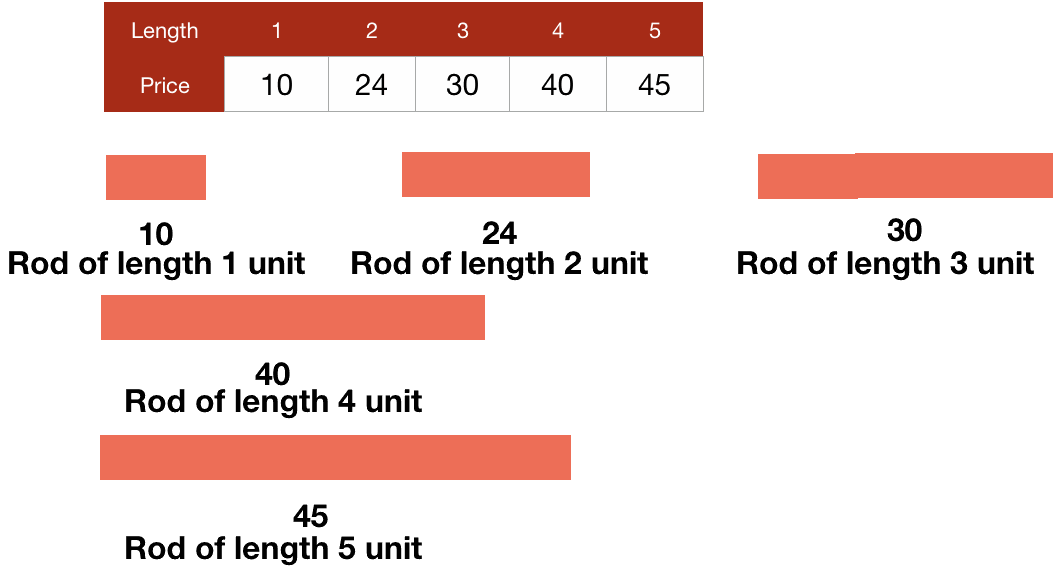

Como podemos ver en la imagen, se tiene una lista de precio $Price[10,24,30,40,45]$ y el vector resultante al calcular las soluciones óptimas para cada subproblema de tamaño $n$ en el intervalo $[1,5]$.

**Paso 1:** El caso base es una varilla de largo $n=1$, por lo que existe un único corte posible de largo 1 y su solución óptima para esta varilla es $Price[1]$. Este resultado se copia en $Solution[1]$, con el propósito de no tener que resolver este subproblema en los pasos siguientes. 

**Paso 2:** Se tiene una varilla de largo $n=i$ con $i>1$, por lo que se tiene que calcular la ganancia máxima que se podría generar con todas la combinaciones de cortes posibles, menos los cortes cuya solución óptima se encuentre guardada en el vector $Solution$.

**Paso 3:** Se retorna el valor correspondiente a la ganancia máxima de la varilla, el cual se encuentra almacenado en $Solution[n]$. 



## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

**Cutting rod recursivo**

In [34]:
a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
cut = [0] * (len(a) + 1)
q = recursiveCuttingRod(a, len(a), cont, verbose = True)

Coste de la varilla de largo 1: 9
Corte máximo en 1: 90
Retorno máximo actual: 90

Coste de la varilla de largo 2: 17
Corte máximo en 2: 89
Retorno máximo actual: 90

Coste de la varilla de largo 3: 20
Corte máximo en 3: 83
Retorno máximo actual: 90

Coste de la varilla de largo 4: 24
Corte máximo en 4: 78
Retorno máximo actual: 90

Coste de la varilla de largo 5: 34
Corte máximo en 5: 79
Retorno máximo actual: 90

Coste de la varilla de largo 6: 35
Corte máximo en 6: 71
Retorno máximo actual: 90

Coste de la varilla de largo 7: 45
Corte máximo en 7: 72
Retorno máximo actual: 90

Coste de la varilla de largo 8: 49
Corte máximo en 8: 67
Retorno máximo actual: 90

Coste de la varilla de largo 9: 50
Corte máximo en 9: 59
Retorno máximo actual: 90

Coste de la varilla de largo 10: 59
Corte máximo en 10: 59
Retorno máximo actual: 90

Ganancia máxima: 90


**Cutting rod dinámico**

In [37]:
a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
cut = [0] * (len(a) + 1)
q = dynamicCuttingRod(a, len(a), cont, verbose = True)

El valor del subproblema 0 siempre es 0

Cortes posibles para varilla de largo 1:
9 
Valor máximo del subproblema 1 = 9

Cortes posibles para varilla de largo 2:
18 17 
Valor máximo del subproblema 2 = 18

Cortes posibles para varilla de largo 3:
27 26 20 
Valor máximo del subproblema 3 = 27

Cortes posibles para varilla de largo 4:
36 35 29 24 
Valor máximo del subproblema 4 = 36

Cortes posibles para varilla de largo 5:
45 44 38 33 34 
Valor máximo del subproblema 5 = 45

Cortes posibles para varilla de largo 6:
54 53 47 42 43 35 
Valor máximo del subproblema 6 = 54

Cortes posibles para varilla de largo 7:
63 62 56 51 52 44 45 
Valor máximo del subproblema 7 = 63

Cortes posibles para varilla de largo 8:
72 71 65 60 61 53 54 49 
Valor máximo del subproblema 8 = 72

Cortes posibles para varilla de largo 9:
81 80 74 69 70 62 63 58 50 
Valor máximo del subproblema 9 = 81

Cortes posibles para varilla de largo 10:
90 89 83 78 79 71 72 67 59 59 
Valor máximo del subproblema 10 = 90

Gana

#**3. Tiempo de ejecución**

## Tiempo de ejecución recursivo

Es posible definir la función de recursión $T(n)$ en términos de todos los sub-problemas posibles (todos los cortes posibles). Esto es lograble iterando $i$ de $0$ hasta $n-1$. Pasando efectivamente por todos los subproblemas. La función de recurrencia $T(n)$ es la siguiente.

$T(n)$ = $\sum\limits_{i=0}^{n-1} i= T(i)$

Para comprobar el tiempo de ejecución se dice que $T(n) = 2^n$ es correcto para un valor de $n$ arbritario. Luego:

$T(n + 1)$ = $T(n) + $$\sum\limits_{i=0}^{n-1} i= T(i)$

Reemplazando, obtenemos:

$T(n + 1) = T(n) + T(n)$

$2 * 2^n = 2^{n+1}$

### Número de subproblemas realizados

Para obtener la cantidad de subproblemas podemos acudir a los siguiente:
**Para cada problema $i$ se resuelven $i$ subproblemas**. Luego, podemos plantear la siguiente función para calcular la cantidad total de subproblemas resueltos por el algoritmo:

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

## Tiempo de ejecución Programación Dinámica

El tiempo de ejecución de esta rutina es $O(n^2)$ ya que cada subproblema
es resuelto exactamente una vez. Para resolver el subproblema en la posición
$i$, realizamos $i$ iteraciones del ciclo. 

Para calcular esto se define el tiempo de ejecución $T(n)$:

$$
\begin {aligned}
T(n) &= c \sum_{i = 0} ^ {n-1} \sum _ {j = 1}  ^ {i} j \\
&=  c \sum_{i = 0} ^ {n-1} j \\
&=  c \cdot \cfrac {n (n+1)} {2} \\
&=  O(n^2)
\end {aligned}
$$

### Complejidad espacial

La complejidad espacial del corte de varillas dinámico es de $O(n)$, ya que este algoritmo utiliza una cantidad de memoria equivalente al largo de la varilla.

# **4. Correctitud**

Lema: El arreglo auxiliar posee las soluciones de todos los subproblemas anteriores

**Inicialización**: No existen subproblemas anteriores. $(i=0)$.

**Mantención**: Se calcula el subproblema del corte en la posición actual $(i)$.

**Finalización**: Todos los subproblemas han sido calculados correctamente.

El arreglo auxiliar que guarda los resultados contiene las solución final del problema.

# **5. Experimentos.**

## 5.1. Cutting rod recursivo v/s dinámico

A continuación se muestra gráficamente una comparación entre los tiempos de ejecución del algoritmo de cutting rod recursivo y cutting rod dinámico en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $20$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

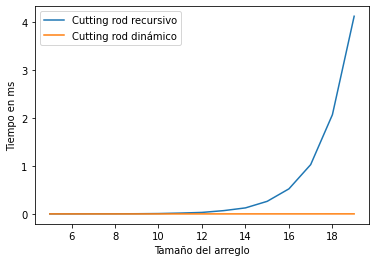

In [17]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

# Función brindada por el profesor.
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

x = []
y1 = []
y2 = []

for n in range(5,20):
  a = cutrod_instance_generator(n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces recursiveCuttingRod con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import recursiveCuttingRod", stmt=f"recursiveCuttingRod({a},{len(a)},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicCuttingRod", stmt=f"dynamicCuttingRod({a},{len(a)},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)


plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Cutting rod recursivo", "Cutting rod dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Como se puede deducir del gráfico el tiempo de ejecución del algoritmo dinámico es mucho más eficiente que el recursivo. El tiempo de ejecución del algoritmo recursivo crece de forma exponencial y tiene complejidad $O(2^n)$, mientras que el tiempo de ejecución del algoritmo dinámico sigue una curva cuadrática y tiene complejidad $O(n^2)$.

## 5.2. Cantidad de subproblemas (bottom-up)

En el siguiente gráfico se muestra la cantidad de subproblemas que debe resolver el algoritmo en función al tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$

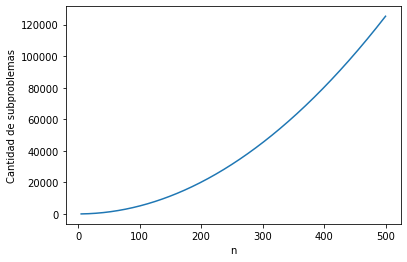

In [22]:
import random
import matplotlib.pyplot as plt

x = []
y = []

for n in range(5,501):
  a = cutrod_instance_generator(n)
  cont = [0]
  dynamicCuttingRod(a,n,cont)
  x.append(n)
  y.append(cont[0])

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas')
plt.show()

### **Análisis de resultados**



Del gráfico se puede deducir que la cantidad de subproblemas aumenta cuadráticamente en relación al tamaño del problema, esto debido a su complejidad temporal $O(n^2)$.